# ARCH模型

## 原理讲解

### 产生背景

通常认为，横截面数据容易存在异方差，而时间序列数据常存在自相关。然而，Engle（1982）指出，时间序列数据也常存在一种特殊的异方差，即“自回归条件异方差”（Autoregressive Conditional Heteroskedasticity，简记 ARCH）Bollerslev（1986）对 ARCH 进行了推广，称为“ Generalized ARCH“，简记 GARCH
考察美国道琼斯股指在1953—1990年期间日收益率的波动，参见下图

<div align=center><img src="https://gitee.com/lei940324/picture/raw/master/img/2020/0516/231510.png" width="499" ></div>

从图可以看出，股指日收益率在某一段时间内剧烈波动，而在另一段时间内风平浪静。从理论上，这可以抽象为，当本期或过去若干期的波动（方差）较大时，未来几期的波动（方差）很可能也较大；反之亦然。换言之，方差大的观测值似乎集聚在一起，而方差小的观测值似乎也集聚在一起。这被称为“波动性集聚“（ volatility clustering）或“扎堆“。

### ARCH 模型的性质

考虑一般的线性回归模型:

$$y_{t}=x_{t}^{\prime} \boldsymbol{\beta}+\varepsilon_{t}\tag{1}$$

记扰动项 $\varepsilon_{t}$ 的条件方差为$\sigma_{t}^{2} \equiv \operatorname{Var}\left(\varepsilon_{t} | \varepsilon_{t-1}, \cdots\right)$，其中 $\sigma_{t}^{2}$ 的下标 $t$ 表示条件方差可以随时间而变。受到波动性集聚现象的启发，假设 $\sigma_{t}^{2}$ 取决于上一期扰动项之平方：

$$\sigma_{t}^{2}=\alpha_{0}+\alpha_{1} \varepsilon_{t-1}^{2}\tag{2}$$

这就是“ ARCH(1)扰动项”。更一般地，假设 $\sigma_{t}^{2}$ 依赖于前 $p$ 期扰动项之平方:

$$\sigma_{t}^{2}=\alpha_{0}+\alpha_{1} \varepsilon_{t-1}^{2}+\cdots+\alpha_{p} \varepsilon_{t-p}^{2}\tag{3}$$

就是“ ARCH(p)扰动项”。不失一般性，以 ARCH(1)扰动项为例，来考察 ARCH 扰动项的性质。假设扰动项 $\varepsilon_{t}^{2}$ 的生成过程为:

$$\varepsilon_{t}=v_{t} \sqrt{\alpha_{0}+\alpha_{1} \varepsilon_{t-1}^{2}}\tag{4}$$

其中，$v_{t}$ 为白噪声，并将其方差标准化为 1，即 $\operatorname{Var}\left(v_{t}\right)=\mathrm{E}\left(v_{t}^{2}\right)=1$。假定 $v_{t}$ 与$\epsilon _ { t - 1 }$相互独立，而且$\alpha _ { 0 } > 0$，$0 < \alpha _ { 1 } < 1$（为了保证 $\sigma_{t}^{2}$ 为正，且 {$\varepsilon_{t}^{2}$} 为平稳过程）。序列 {$\varepsilon_{t}^{2}$} 具有怎样的性质呢？下面我们来考察其条件期望、无条件期望、条件方差、无条件方差及序列相关。

由于 $v _ { t }$ 与 $\epsilon _ { t - 1 }$ 相互独立，$\epsilon_t$ 的条件期望为 $\operatorname{Var}\left(\varepsilon_{t} | \varepsilon_{t-1}\right)=\alpha_{0}+\alpha_{1} \varepsilon_{t-1}^{2}$

扰动项 $\epsilon _ { t }$ 完全满足古典模型关于"同方差"与"无自相关"的假定。事实上，虽然 $\epsilon _ { t }$ 存在条件异方差，却是白噪声！因此，高斯-马尔可夫定理成立，OLS 是最佳线性无偏估计( BLUE)。然而，OLS 显然忽略了条件异方差这一重要信息。如果我们跳出线性估计的范围，则可以找到更优的非线性估计，即最大似然估计。

### ARCH 模型的 MLE 估计
考虑在 $\varepsilon_{1}$ 给定情况下的条件最大似然估计法。假设 $\varepsilon_{t} \sim N\left(0, \sigma_{t}^{2}\right),$ 而 $\sigma_{t}^{2}=\alpha_{0}+\alpha_{1} \varepsilon_{t-1}^{2},$ 可得似然函数:

$$L=\prod_{t=2}^{T} \frac{1}{\sqrt{2 \pi\left(\alpha_{0}+\alpha_{1} \varepsilon_{t-1}^{2}\right)}} \exp \left\{-\frac{\varepsilon_{t}^{2}}{2\left(\alpha_{0}+\alpha_{1} \varepsilon_{t-1}^{2}\right)}\right\}\tag{5}$$

$$\ln L=-\frac{T-1}{2} \ln 2 \pi-\frac{1}{2} \sum_{t=2}^{T} \ln \left(\alpha_{0}+\alpha_{1} \varepsilon_{t-1}^{2}\right)-\frac{1}{2} \sum_{t=2}^{T} \frac{\varepsilon_{1}^{2}}{\alpha_{0}+\alpha_{1} \varepsilon_{t-1}^{2}}\tag{6}$$

### arch 检验
残差平方的自回归模型

## arch 模块实现
arch 模块是一个计算波动率模型和其他金融计量模型的 python 第三方库

参考网址：[Introduction to ARCH Models](https://arch.readthedocs.io/en/latest/univariate/introduction.html#arch.univariate.arch_model)

In [1]:
from arch import arch_model
import pandas as pd

data = pd.read_excel('../数据/上证指数与沪深300.xlsx')

model_arch = arch_model(y=0.1*data['sz'], mean='Constant', lags=0, vol='ARCH',p=1,
                       o=0, q=0, dist='normal')   # 构建 ARCH（1)模型
res = model_arch.fit()
res.summary()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 1923.6932364414192
Iteration:      2,   Func. Count:     11,   Neg. LLF: 1923.162947215128
Iteration:      3,   Func. Count:     17,   Neg. LLF: 1922.1842310424095
Iteration:      4,   Func. Count:     22,   Neg. LLF: 1921.483148279247
Iteration:      5,   Func. Count:     27,   Neg. LLF: 1917.471001856402
Iteration:      6,   Func. Count:     32,   Neg. LLF: 1891.7858215720626
Iteration:      7,   Func. Count:     38,   Neg. LLF: 1889.0247378253703
Iteration:      8,   Func. Count:     44,   Neg. LLF: 1886.4627659281025
Iteration:      9,   Func. Count:     50,   Neg. LLF: 1884.0987939004042
Iteration:     10,   Func. Count:     56,   Neg. LLF: 1881.9330688254076
Iteration:     11,   Func. Count:     62,   Neg. LLF: 1879.966578970129
Iteration:     12,   Func. Count:     68,   Neg. LLF: 1876.9509411902761
Iteration:     13,   Func. Count:     74,   Neg. LLF: 1875.5378969495873
Iteration:     14,   Func. Count:     80,   Neg. LLF: 1

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                     sz   R-squared:                      -0.006
Mean Model:             Constant Mean   Adj. R-squared:                 -0.006
Vol Model:                       ARCH   Log-Likelihood:               -1871.17
Distribution:                  Normal   AIC:                           3748.33
Method:            Maximum Likelihood   BIC:                           3760.73
                                        No. Observations:                  460
Date:                Wed, Jun 03 2020   Df Residuals:                      457
Time:                        20:59:22   Df Model:                            3
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu           291.1828      0.989    294.438      0.000 [2.892e+02,2.931e+02]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          5.4661      1.761      3.105  1.906e-03 [  2.015,  8.917]
alpha[1]       1.0000  3.448e-02     29.001 6.408e-185 [  0.932,  1.068]
========================================================================

Covariance estimator: robust
"""

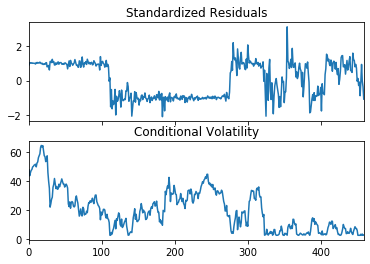

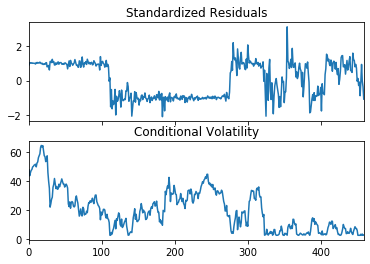

In [2]:
res.plot()

## matlab 实现
### fmincon 函数介绍
fmincon 是用于求解非线性多元函数最小值的 matlab 函数，优化工具箱提供 fmincon 函数用于对有约束优化问题进行求解。

可参考：[百度百科关于 fmincon 函数的介绍](https://baike.baidu.com/item/fmincon/17032570?fr=aladdin)

### 代码实现
```matlab
function archL = arch_model(beta,Y,X)

%beta(1)=beta0,beta(2)=a0,beta(3)=a1

% 1.均值方程
T = length(Y);
resid = Y - beta(1)*X;

% 2.方差方程
sigam1 = -0.5*(T-1)*log(2*pi)-0.5*log(beta(2)/(1-beta(3)))-0.5*resid(1)^2/(beta(2)/(1-beta(3)));
for i = 2:T
    c1(i-1) = -0.5*log(beta(2)+beta(3)*resid(i-1)^2);
end
for i = 2:T
    c2(i-1) = -0.5*log(resid(i).^2/(beta(2)+beta(3)*resid(i-1)^2));
end
archL = sigam1-0.5*(T-1)*log(2*pi)+sum(c1)+sum(c2);
archL = -archL;

% %导入数据
% data = xlsread('C:\Users\Administrator\Desktop\hourse.xlsx');
% f1 = data(:,2); f2 = data(:,3); e = data(:,6);
% 
% % 2.初始参数设定
% maxsize         = 2000;         % 生成均匀随机数的个数(用于赋初值)
% REP			    = 100;          % 若发散则继续进行迭代的次数
% nInitialVectors    = [maxsize, 2];    % 生成随机数向量
% MaxFunEvals    = 5000;         % 函数评价的最大次数
% MaxIter         = 5000;         % 允许迭代的最大次数
% options = optimset('LargeScale', 'off','HessUpdate', 'dfp','MaxFunEvals', ...
% MaxFunEvals, 'display', 'on', 'MaxIter', MaxIter, 'TolFun', 1e-6, 'TolX', 1e-6,'TolCon',10^-12);
% 
% % 3.寻找最优初值
% initialTargetVectors = [unifrnd(0,10, nInitialVectors),unifrnd(0,1,[maxsize,1])];
% RQfval = zeros(nInitialVectors(1), 1);
% for i = 1:nInitialVectors(1)
%     RQfval(i) = arch_model (initialTargetVectors(i,:), f1,ones(length(f1),1));
% end
% Results          = [RQfval, initialTargetVectors];
% SortedResults    = sortrows(Results,1);
% BestInitialCond  = SortedResults(1,2: size(Results,2));    
% 
% % 4.迭代求出最优估计值Beta
% A = [0,0,1] ; b = 1;
% [Beta, fval exitflag] = fmincon(@arch_model,BestInitialCond,A,b,[],[],0,[],[],options,f1,ones(length(f1),1));
% for it = 1:REP
% if exitflag == 1, break, end
% [Beta, fval exitflag] = fmincon(@arch_model,BestInitialCond,A,b,[],[],0,[],[],options,f1,ones(length(f1),1));
% end
% if exitflag~=1, warning('警告：迭代并没有完成'), end
```